# **Cycling Performance Analysis & Prediction**

## **Objectives**  
- 📊 **Analyze** trends in **Resting Heart Rate (RHR)**, **power output**, **cadence**, and **speed** over time.  
- 🔍 **Identify** correlations between **heart rate, power efficiency, and speed** using data visualizations.  
- 📈 **Predict** future **RHR trends** using **Linear Regression** to assess training effectiveness.  
- 🚴‍♂️ **Provide insights** into cardiovascular performance and training adaptation for optimization.  

## **Key Features**  

### **Data Visualization**  
- 📅 Trends of **Resting Heart Rate (RHR)** over time.  
- ⚡ Relationship between **Heart Rate and Power Output**.  
- 🔄 Correlation between **Cadence and Speed**.  
- 📈 Trend of **Peak Power Output** over time.  

### **Predictive Analysis**  
- 🔢 Uses **Linear Regression** to predict future **Avg BPM (Resting Heart Rate)**.  
- ✅ Identifies whether the **RHR trend is improving or declining**.  


In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data from CSV file
file_path = r"Training_Data - Cycling.csv"
df = pd.read_csv(file_path)


### 1. Resting Heart Rate Trend
#### Resting Heart Rate Trend
This graph plots your average BPM over time to determine if your resting heart rate is decreasing. A lower resting heart rate over time typically indicates improved cardiovascular fitness and increased efficiency of the heart.


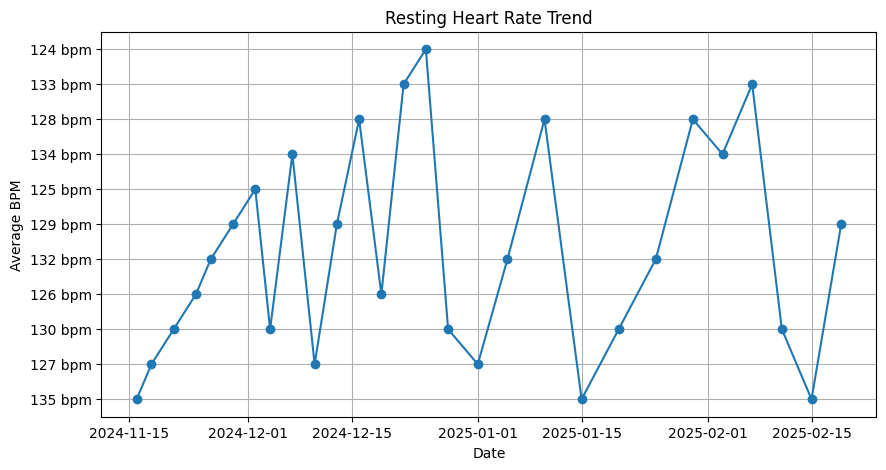

In [5]:
# Convert to DataFrame
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%y')

plt.figure(figsize=(10,5))
plt.plot(df['Date'], df['Avg BPM'], marker='o', linestyle='-')
plt.xlabel('Date')
plt.ylabel('Average BPM')
plt.title('Resting Heart Rate Trend')
plt.grid()
plt.show()


### 2. Power-to-Heart Rate Efficiency
#### Power-to-Heart Rate Efficiency
This scatter plot shows the relationship between power output (watts) and average BPM. If your heart rate remains stable while power output increases, it indicates better efficiency and improved endurance.


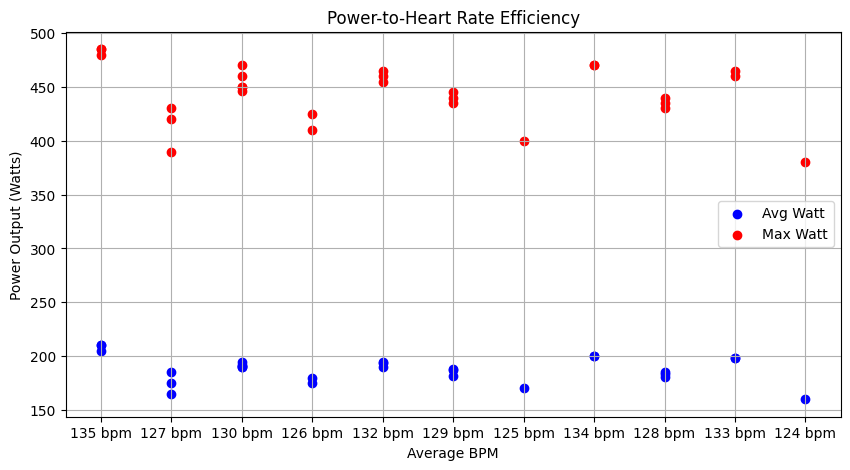

In [6]:
plt.figure(figsize=(10,5))
plt.scatter(df['Avg BPM'], df['Avg Watt'], c='blue', label='Avg Watt')
plt.scatter(df['Avg BPM'], df['Max Watt'], c='red', label='Max Watt')
plt.xlabel('Average BPM')
plt.ylabel('Power Output (Watts)')
plt.title('Power-to-Heart Rate Efficiency')
plt.legend()
plt.grid()
plt.show()


### 3. Cadence vs. Speed Relationship

#### Cadence vs. Speed Relationship
This graph examines how cadence (RPM) affects your speed (MPH). A higher cadence at a given speed suggests improved pedaling efficiency, while a declining trend might indicate fatigue or inefficiencies in technique.


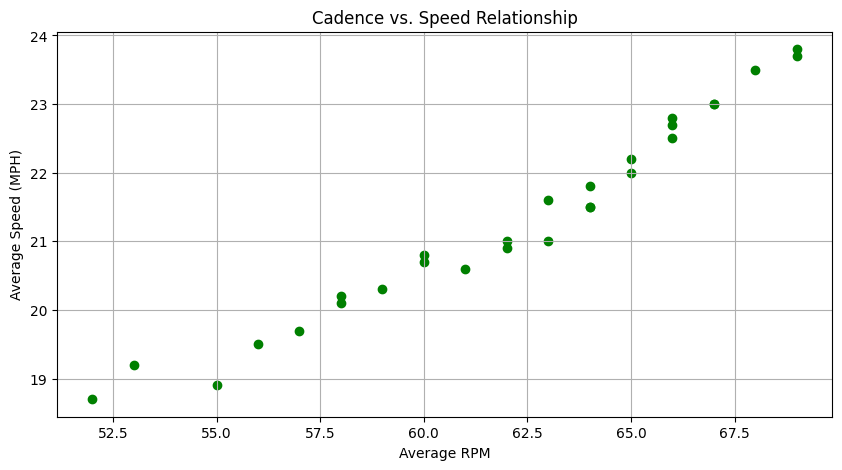

In [7]:

plt.figure(figsize=(10,5))
plt.scatter(df['Avg RPM'], df['Avg Speed (MPH)'], c='green')
plt.xlabel('Average RPM')
plt.ylabel('Average Speed (MPH)')
plt.title('Cadence vs. Speed Relationship')
plt.grid()
plt.show()


### 4. Heart Rate vs. Speed Relationship

#### Heart Rate vs. Speed Relationship
This plot compares your average BPM to speed (MPH). If you can maintain the same speed at a lower heart rate over time, it signifies better endurance and cardiovascular conditioning.


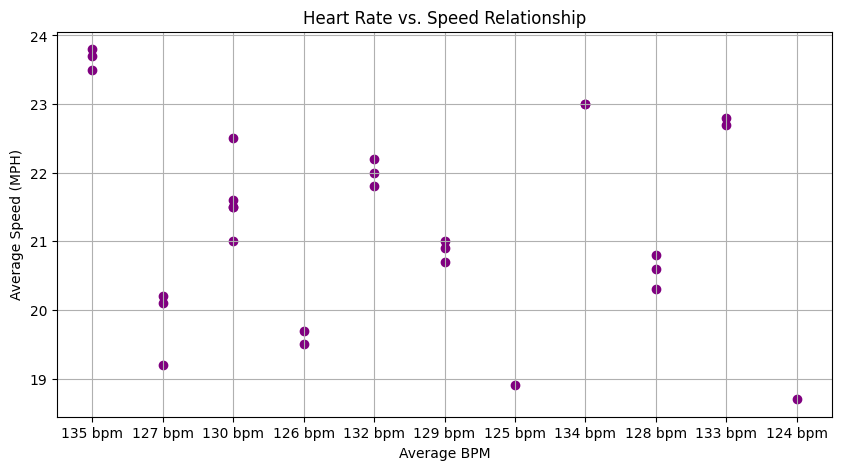

In [8]:

plt.figure(figsize=(10,5))
plt.scatter(df['Avg BPM'], df['Avg Speed (MPH)'], c='purple')
plt.xlabel('Average BPM')
plt.ylabel('Average Speed (MPH)')
plt.title('Heart Rate vs. Speed Relationship')
plt.grid()
plt.show()


### 5. Peak Power Trend
#### Peak Power Trend
This graph tracks maximum wattage over time to assess improvements in strength and power output. An upward trend suggests increasing leg strength and muscular endurance, key for sustaining higher efforts during cycling sessions.


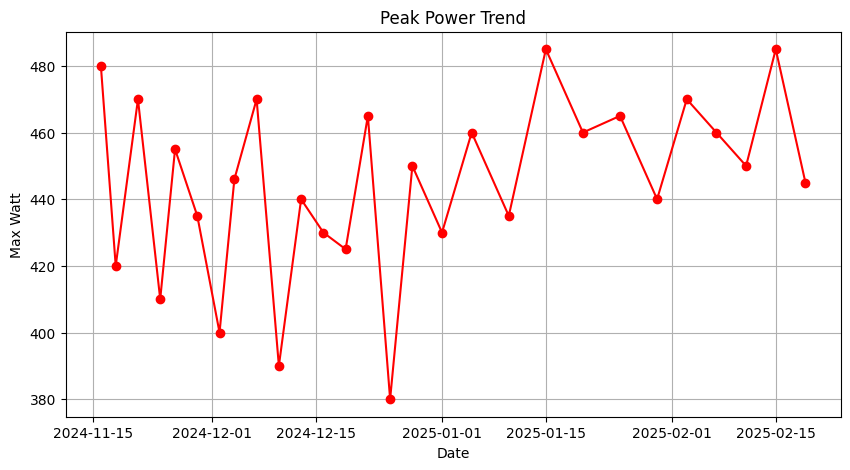

In [9]:

plt.figure(figsize=(10,5))
plt.plot(df['Date'], df['Max Watt'], marker='o', linestyle='-', color='red')
plt.xlabel('Date')
plt.ylabel('Max Watt')
plt.title('Peak Power Trend')
plt.grid()
plt.show()


/Users/jung/env/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


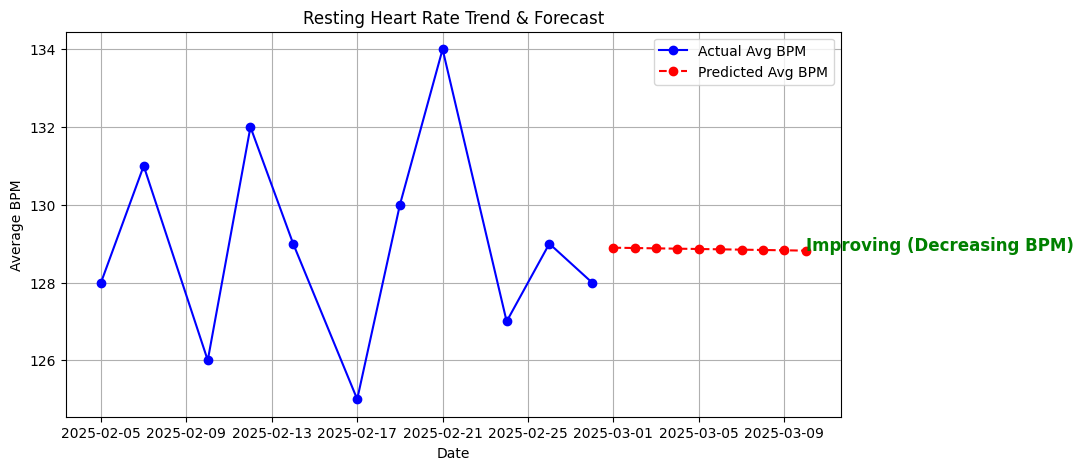

In [10]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Sample cycling data (Replace with actual data)
data = {
    "Date": ["05/02/25", "07/02/25", "10/02/25", "12/02/25", "14/02/25", "17/02/25", "19/02/25", "21/02/25", "24/02/25", "26/02/25", "28/02/25"],
    "Avg BPM": [128, 131, 126, 132, 129, 125, 130, 134, 127, 129, 128]
}

# Convert data to DataFrame
df = pd.DataFrame(data)

# Convert Date column to datetime format
df["Date"] = pd.to_datetime(df["Date"], format="%d/%m/%y")

# Convert dates to numerical values for regression
df["Days"] = (df["Date"] - df["Date"].min()).dt.days

# Prepare training data
X = df[["Days"]]
y = df["Avg BPM"]

# Train Linear Regression Model
model = LinearRegression()
model.fit(X, y)

# Predict future RHR for the next 10 days
future_days = np.arange(df["Days"].max() + 1, df["Days"].max() + 11).reshape(-1, 1)
future_dates = pd.date_range(df["Date"].max() + pd.Timedelta(days=1), periods=10, freq='D')
future_predictions = model.predict(future_days)

# Plot actual and predicted RHR trend
plt.figure(figsize=(10, 5))
plt.plot(df["Date"], df["Avg BPM"], marker="o", linestyle="-", color="b", label="Actual Avg BPM")
plt.plot(future_dates, future_predictions, marker="o", linestyle="--", color="r", label="Predicted Avg BPM")

# Identify trend improvement
slope = model.coef_[0]
if slope < 0:
    trend_status = "Improving (Decreasing BPM)"
    color = "green"
else:
    trend_status = "Not Improving (Increasing BPM)"
    color = "red"

# Add trend text
plt.text(future_dates[-1], future_predictions[-1], trend_status, fontsize=12, color=color, fontweight='bold')

# Labels and title
plt.xlabel("Date")
plt.ylabel("Average BPM")
plt.title("Resting Heart Rate Trend & Forecast")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()
